In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline

# Define the list of datasets and their corresponding names
datasets = ['processed_categorical_dataset_basen.csv', 'processed_categorical_dataset_label.csv', 'processed_categorical_dataset_target.csv']
setnames = ['Base-N encoding', 'Label encoding', 'Target encoding']

# Select the dataset index from the list
select = 2

# Define the path to the original data directory
path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"

# Read the selected dataset
dataset = pd.read_csv(os.path.join(path_original_data, datasets[select]), low_memory=False)

# Shuffle all rows randomly for better analysis (optional step)
dataset_shuffled = dataset.copy()
dataset_shuffled = dataset.sample(frac=1, random_state=42)  # Set random_state for reproducibility

# Reset the index after shuffling
dataset_shuffled = dataset_shuffled.reset_index(drop=True)

# For clarity, use the shuffled dataset or you can use the original dataset as well
dataset = dataset_shuffled

# Get the name of the current dataset
name_of_set = setnames[select]

# Print the shape (number of rows and columns) of the dataset
print(dataset.shape)

# Display the first few rows of the dataset
dataset.head()

(113549, 19)


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0.450000,0.450,0.450,0.45,0.791643,0.0,0.433503,0.703,0.64854,-0.141467,1.0,0.550301,0.759809,0.000000,0.986648,0.703518,0.346959,0.024533,0.747264
1,0.413750,0.396,0.370,0.37,0.747540,0.0,0.661929,0.701,-0.58157,-0.165109,1.0,0.514530,0.730846,0.069911,0.903482,0.932663,0.649721,0.024533,0.654956
2,0.246000,0.170,0.170,0.17,0.780652,0.0,0.581726,0.976,-0.75730,-0.080838,0.0,0.713946,0.006774,0.466950,0.770750,0.316583,0.468501,0.024533,0.378901
3,0.225714,0.230,0.345,0.23,0.811699,0.0,0.285279,0.141,-0.23011,-0.386122,0.0,0.510321,0.990923,0.975421,0.634698,0.207035,0.556169,-0.231600,0.490237
4,0.203636,0.250,0.250,0.25,0.812804,0.0,0.409137,0.921,0.64854,-0.055642,1.0,0.647699,0.180917,0.000000,0.629053,0.576884,0.730667,0.024533,0.416896


In [2]:
# Separate the features (X) and target variable (Y) from the dataset

# Define the name of the target variable
output = "popularity"

# Get the features (X) by dropping the target variable from the dataset
X = dataset.drop([output], axis=1).values

# Get the target variable (Y) by extracting only the 'popularity' column from the dataset
Y = dataset[output].values

# Get the list of feature names (column names excluding the target variable column)
inputs = list(dataset.drop([output], axis=1).columns)

# Print the list of features (column names)
print("List of features:")
print(inputs)

# Print a separator line for better readability
print("-" * 40)

# Print the feature matrix (X)
print("Matrix of features:")
print(X)

# Print a separator line for better readability
print("-" * 40)

# Print the target variable (Y)
print("Target Variable:")
print(Y)

List of features:
['artists', 'album_name', 'track_name', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
----------------------------------------
Matrix of features:
[[ 0.45        0.45        0.45       ...  0.34695857  0.02453307
   0.74726367]
 [ 0.41375     0.396       0.37       ...  0.64972141  0.02453307
   0.65495642]
 [ 0.246       0.17        0.17       ...  0.4685009   0.02453307
   0.37890145]
 ...
 [ 0.34090909  0.20777778  0.43       ...  0.56437881 -0.2316002
   0.63970683]
 [ 0.511       0.44        0.575      ...  0.4282251   0.02453307
   0.71664641]
 [ 0.56        0.56        0.56       ...  0.69814112  0.02453307
   0.90594553]]
----------------------------------------
Target Variable:
[0.45 0.37 0.17 ... 0.43 0.44 0.56]


In [3]:
class RidgeRegScratch():
    def __init__(self, alpha=1.0):
        # Constructor to initialize the Ridge Regression model
        # alpha: Regularization parameter (default = 1.0)
        self.alpha = alpha

    def fit(self, X, y):
        # Fit the Ridge Regression model to the given data
        # X: Feature matrix of shape (n_samples, n_features)
        # y: Target variable vector of shape (n_samples,)
        
        # Add an intercept term to the feature matrix
        X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
        self.X_intercept = X_with_intercept
        
        # number of columns in the matrix of X including the intercept
        dimension = X_with_intercept.shape[1]
        
        # Identity matrix of dimension compatible with our X_intercept Matrix
        A = np.identity(dimension)
        
        # Set the first 1 on the diagonal to zero to exclude a bias term for the intercept
        A[0, 0] = 0
        
        # Create a bias term corresponding to alpha for each column of X not including the intercept
        A_biased = self.alpha * A
        
        # Calculate the optimal coefficients (thetas) using the closed-form solution
        thetas = np.linalg.inv(X_with_intercept.T.dot(X_with_intercept) + A_biased).dot(X_with_intercept.T).dot(y)
        
        self.thetas = thetas
        return self

    def predict(self, X):
        # Make predictions using the fitted Ridge Regression model
        # X: Feature matrix of shape (n_samples, n_features)
        
        # Get the coefficients (thetas) from the model
        thetas = self.thetas
        
        # Add an intercept term to the feature matrix for prediction
        X_predictor = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculate the predicted target variable (predictions) using the coefficients
        self.predictions = X_predictor.dot(thetas)
        return self.predictions

    def get_params(self, deep=False):
        # Get the parameters of the Ridge Regression model
        # deep: Whether to get deep (nested) parameters (default = False)
        
        return {'alpha': self.alpha}

### Find optimal training parameter

In [4]:
from sklearn.model_selection import cross_validate
import numpy as np

# List of potential alpha values to test
alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]

# Create a list of multiplied alpha values
multiplied_alpha_values = [alpha * factor for alpha in alpha_values for factor in range(2, 10)]

# Combine the original alpha_values list with the multiplied_alpha_values list
combined_alpha_values = alpha_values + multiplied_alpha_values

# Sort the combined_alpha_values list in ascending order
alpha_values = sorted(combined_alpha_values)

# Initialize empty lists to store average training scores for each alpha
average_train_scores = []

# Create an instance of the RidgeRegScratch model
ridge_model = RidgeRegScratch()

# Loop over each alpha value and perform cross-validation
for alpha in alpha_values:
    # Set the current alpha value in the ridge_model
    ridge_model.alpha = alpha
    
    # Perform cross-validation with 5 folds and calculate the scores
    ridge_result = cross_validate(ridge_model, X, Y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
    
    # Extract the average training score for the current alpha
    average_train_score = -np.mean(ridge_result['train_score'])
    
    # Append the average training score to the list
    average_train_scores.append(average_train_score)

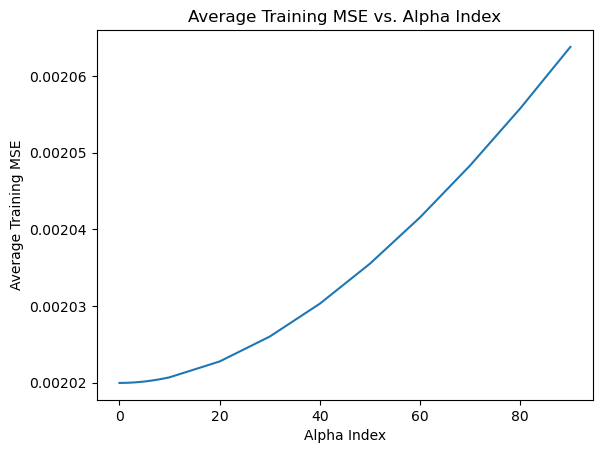

Optimal Alpha: 1e-05


In [5]:
# Plot the average training scores against a range of integers representing the index of each alpha
plt.plot(alpha_values, average_train_scores)
plt.xlabel('Alpha Index')
plt.ylabel('Average Training MSE')
plt.title('Average Training MSE vs. Alpha Index')
plt.show()

# Identify the alpha value with the lowest average training score (smallest MSE)
optimal_alpha = alpha_values[np.argmin(average_train_scores)]
print(f'Optimal Alpha: {optimal_alpha}')

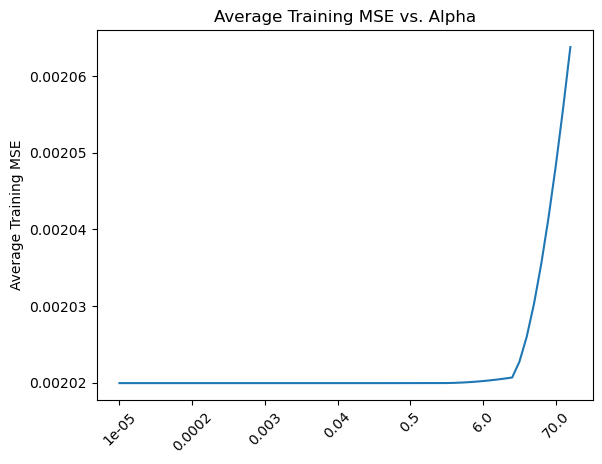

Optimal Alpha: 1e-05


In [6]:
# Round the alpha values to up to 5 decimal places
alpha_values_rounded = [round(alpha, 5) for alpha in alpha_values]

# Plot the average training scores against a range of integers representing the index of each alpha
plt.plot(range(len(average_train_scores)), average_train_scores)
plt.xticks(range(0, len(alpha_values_rounded), 10), alpha_values_rounded[::10], rotation=45) # Set rounded alpha_values as x-axis labels with a step of 10plt.xlabel('Alpha')
plt.ylabel('Average Training MSE')
plt.title('Average Training MSE vs. Alpha')
plt.show()

# Identify the alpha value with the lowest average training score (smallest MSE)
optimal_alpha = alpha_values[np.argmin(average_train_scores)]
print(f'Optimal Alpha: {optimal_alpha}')

### Get the results from algorithim

In [7]:
from sklearn.model_selection import cross_validate
import numpy as np

ridge_model = RidgeRegScratch(alpha=0.00001)

# Specify the scoring metrics to be used
scoring = { 'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error', 'r2': 'r2', 'rmse': 'neg_root_mean_squared_error'}

# Perform cross-validation with 5 folds and calculate the scores
ridge_result = cross_validate(ridge_model, X, Y, scoring=scoring, cv=5, return_train_score=True)

# Extract the results for each scoring metric
mse_scores_train = -ridge_result['train_mse']
mse_scores_test = -ridge_result['test_mse']

mae_scores_train = -ridge_result['train_mae']
mae_scores_test = -ridge_result['test_mae']

r2_scores_train = ridge_result['train_r2']
r2_scores_test = ridge_result['test_r2']

rmse_scores_train = -ridge_result['train_rmse']
rmse_scores_test = -ridge_result['test_rmse']

# Print the scores
print(f'Train Mean Squared Error (MSE): {np.mean(mse_scores_train)}')
print(f'Test Mean Squared Error (MSE): {np.mean(mse_scores_test)}\n')

print(f'Train Mean Absolute Error (MAE): {np.mean(mae_scores_train)}')
print(f'Test Mean Absolute Error (MAE): {np.mean(mae_scores_test)}\n')

print(f'Train R-Squared (R2): {np.mean(r2_scores_train)}')
print(f'Test R-Squared (R2): {np.mean(r2_scores_test)}\n')

print(f'Train Root Mean Squared Error (RMSE): {np.mean(rmse_scores_train)}')
print(f'Test Root Mean Squared Error (RMSE): {np.mean(rmse_scores_test)}')

Train Mean Squared Error (MSE): 0.002019961856836152
Test Mean Squared Error (MSE): 0.0020208635714078194

Train Mean Absolute Error (MAE): 0.024260573337500417
Test Mean Absolute Error (MAE): 0.02426523597337773

Train R-Squared (R2): 0.9593211713301535
Test R-Squared (R2): 0.9593001086447591

Train Root Mean Squared Error (RMSE): 0.04494386681680768
Test Root Mean Squared Error (RMSE): 0.044952137705841194


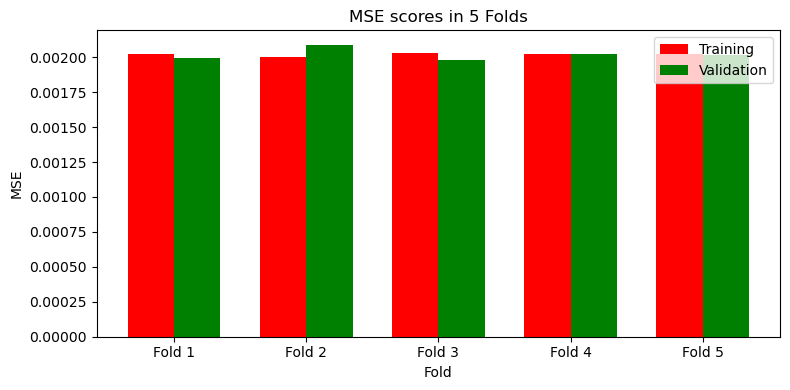

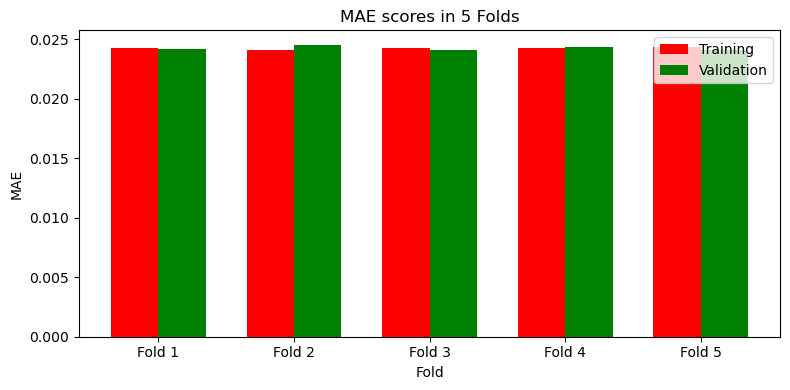

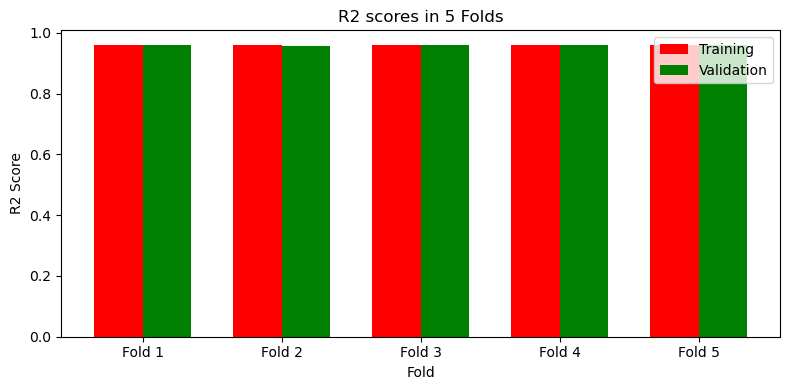

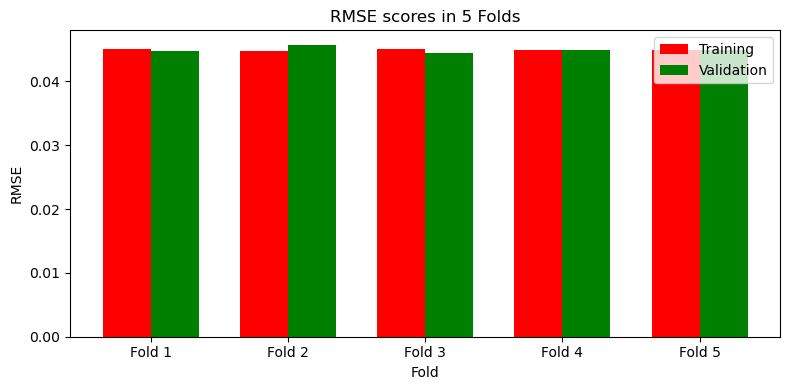

In [8]:
import matplotlib.pyplot as plt

def plot_result(model_name, metric_name, title, train_scores, val_scores):
    fig, ax = plt.subplots(figsize=(8, 4))
    num_folds = len(train_scores)

    # Bar width
    bar_width = 0.35

    # Positions of bars on the x-axis
    x_train = np.arange(num_folds)
    x_val = x_train + bar_width

    # Plot the training scores as blue bars
    ax.bar(x_train, train_scores, bar_width, label='Training', color='red')

    # Plot the validation scores as green bars
    ax.bar(x_val, val_scores, bar_width, label='Validation', color='green')

    # Set the labels, title, and legend
    ax.set_xlabel('Fold')
    ax.set_ylabel(metric_name)
    ax.set_title(title)
    ax.set_xticks(x_train + bar_width / 2)
    ax.set_xticklabels([f'Fold {i+1}' for i in range(num_folds)])
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Assuming you have ridge_result with the metrics as mentioned
model_name = "Ridge Regression"

# Plot the results for each metric
plot_result(model_name, "MSE", "MSE scores in 5 Folds", mse_scores_train, mse_scores_test)
plot_result(model_name, "MAE", "MAE scores in 5 Folds", mae_scores_train, mae_scores_test)
plot_result(model_name, "R2 Score", "R2 scores in 5 Folds", r2_scores_train, r2_scores_test)
plot_result(model_name, "RMSE", "RMSE scores in 5 Folds", rmse_scores_train, rmse_scores_test)


In [9]:
for tr, te in zip(r2_scores_train, r2_scores_test):
    print(f'{tr} - {te}')

0.9591004940186326 - 0.9601735381039364
0.9596809220197994 - 0.9578635406053785
0.9591355062399227 - 0.9600488771604238
0.9594073638547415 - 0.9589557631592924
0.9592815705176709 - 0.9594588241947648


# RESULT VERIFICATION

In [10]:
# Separate features and target variable
output = "popularity"
X = dataset.drop([output], axis=1)  # Features matrix
Y = dataset[output]  # Target variable

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=1)

# Create an instance of the custom Ridge Regression model with alpha=1
ridge_model = RidgeRegScratch(alpha=1)

# Train the model using the training data
ridge_model.fit(xtrain.values, ytrain.values)

# Access the optimal coefficients (thetas) learned by the model after training
coefficients = ridge_model.thetas

coefficients

In [11]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

output = "popularity"
X = dataset.drop([output], axis=1).values
Y = dataset[output].values

# Define the number of folds for cross-validation
n_splits = 5

# Initialize the cross-validator
kf = KFold(n_splits=n_splits)

# Lists to store the training and validation set indices for each fold
train_indices_list = []
valid_indices_list = []

# Loop through each fold and extract the train-validation indices
for train_indices, valid_indices in kf.split(X):
    train_indices_list.append(train_indices)
    valid_indices_list.append(valid_indices)

# Now, you can use these indices to extract the training and validation sets
for fold in range(n_splits):
    X_train_fold = X[train_indices_list[fold]]
    Y_train_fold = Y[train_indices_list[fold]]
    X_valid_fold = X[valid_indices_list[fold]]
    Y_valid_fold = Y[valid_indices_list[fold]]

    # Create an instance of the custom Ridge Regression model with alpha=1
    ridge_model = RidgeRegScratch(alpha=1)

    # Train the model using the training data
    ridge_model.fit(X_train_fold, Y_train_fold)

    # Make predictions on the validation set
    ridge_model.predict(X_valid_fold)
    predictions = ridge_model.predictions
    
    # Calculate and print evaluation metrics for the fold
    print(f'Fold {fold + 1} - MSE:', mean_squared_error(Y_valid_fold, predictions))
    print(f'Fold {fold + 1} - MAE:', mean_absolute_error(Y_valid_fold, predictions))
    print(f'Fold {fold + 1} - R2:', r2_score(Y_valid_fold, predictions))
    print()

Fold 1 - MSE: 0.001997704364212919
Fold 1 - MAE: 0.02416310794046285
Fold 1 - R2: 0.9601744508860977

Fold 2 - MSE: 0.002087942566718292
Fold 2 - MAE: 0.02454777496801725
Fold 2 - R2: 0.9578630315143066

Fold 3 - MSE: 0.00197803708203435
Fold 3 - MAE: 0.024132801937362225
Fold 3 - R2: 0.9600489045139324

Fold 4 - MSE: 0.00202264469115119
Fold 4 - MAE: 0.02435362716905723
Fold 4 - R2: 0.9589566494404462

Fold 5 - MSE: 0.0020180247578483784
Fold 5 - MAE: 0.02416003807115892
Fold 5 - R2: 0.9594567911111981



In [12]:
def ridge_fit(x, y, alpha):
    predictors = list(x.columns)
    X = x.copy()
    y = y.copy()
    X["intercept"] = 1
    X = X[["intercept"] + predictors]
    penalty = alpha * np.identity(X.shape[1])
    penalty[0][0] = 0
    B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
    B.index = ["intercept"] + predictors
    return B

def ridge_predict(x, B):
    predictors = list(x.columns)
    test_x = x.copy()
    test_x["intercept"] = 1
    test_x = test_x[["intercept"] + predictors]
    predictions = test_x @ B
    return predictions

output = "popularity"
dX = dataset.drop([output], axis=1)
dY = dataset[output]

# Define the number of folds for cross-validation
n_splits = 5

# Initialize the cross-validator
kf = KFold(n_splits=n_splits)

# Lists to store the training and validation set indices for each fold
train_indices_list = []
valid_indices_list = []

# Loop through each fold and extract the train-validation indices
for train_indices, valid_indices in kf.split(X):
    train_indices_list.append(train_indices)
    valid_indices_list.append(valid_indices)

for fold in range(n_splits):
    X_train_fold = dX.iloc[train_indices_list[fold]]  # Use .iloc to select rows by integer indices
    Y_train_fold = dY.iloc[train_indices_list[fold]]  # Use .iloc to select rows by integer indices
    X_valid_fold = dX.iloc[valid_indices_list[fold]]  # Use .iloc to select rows by integer indices
    Y_valid_fold = dY.iloc[valid_indices_list[fold]]  # Use .iloc to select rows by integer indices
    
    # Print the length of each training and validation set
    print(f'Fold {fold + 1} - Training set length: {len(X_train_fold)}')
    print(f'Fold {fold + 1} - Validation set length: {len(X_valid_fold)}')
    print(f'Total Database length: {len(dX)}')
    print()

    # Fit the Ridge Regression model on the training set
    B = ridge_fit(X_train_fold, Y_train_fold, 1)
    
    # Make predictions on the validation set using the fitted model
    predictions = ridge_predict(X_valid_fold, B)
    
    # Evaluate the model using various metrics
    print(f'Fold {fold + 1} - MSE:', mean_squared_error(Y_valid_fold, predictions))
    print(f'Fold {fold + 1} - MAE:', mean_absolute_error(Y_valid_fold, predictions))
    print(f'Fold {fold + 1} - R2:', r2_score(Y_valid_fold, predictions))
    print()

Fold 1 - Training set length: 90839
Fold 1 - Validation set length: 22710
Total Database length: 113549

Fold 1 - MSE: 0.00199770436421289
Fold 1 - MAE: 0.02416310794045401
Fold 1 - R2: 0.9601744508860982

Fold 2 - Training set length: 90839
Fold 2 - Validation set length: 22710
Total Database length: 113549

Fold 2 - MSE: 0.002087942566718307
Fold 2 - MAE: 0.02454777496801536
Fold 2 - R2: 0.9578630315143063

Fold 3 - Training set length: 90839
Fold 3 - Validation set length: 22710
Total Database length: 113549

Fold 3 - MSE: 0.0019780370820343366
Fold 3 - MAE: 0.024132801937358617
Fold 3 - R2: 0.9600489045139327

Fold 4 - Training set length: 90839
Fold 4 - Validation set length: 22710
Total Database length: 113549

Fold 4 - MSE: 0.0020226446911511963
Fold 4 - MAE: 0.024353627169053257
Fold 4 - R2: 0.9589566494404461

Fold 5 - Training set length: 90840
Fold 5 - Validation set length: 22709
Total Database length: 113549

Fold 5 - MSE: 0.0020180247578484587
Fold 5 - MAE: 0.024160038071